In [1]:
from pathlib import Path
import act
import matplotlib
import warnings

%matplotlib inline

Make a file path to data file to read. Notice how we create the path using pathlib but need to convert it to a standard string using str(). ACT does not currently work with pathlib.Path(). Currently there is data to play with as part of the package. This is changing after version 2.*.

In [2]:
filename = str(Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.*.cdf'))
filename

'../data/sgpmetE13.b1/sgpmetE13.b1.*.cdf'

Using Xarray we can read one file using .open_dataset() method or if there is more than one file to read the .open_mfdataset() method. Instead of needing to know the details of Xarray reading methods, we can just use the ACT method which is a wrapper arround .open_mfdataset(). Notice how the filename uses a * character to allow us to read all files matching in the directory. This is a feature of xarray open_mfdataset(). 

Notice that this met_ds object is just an Xarray Dataset with a few extra global attributes added. These are used for plotting lables and titles. All the Xarraymethods will work on this object.

In [3]:
met_ds = act.io.armfiles.read_netcdf(filename)
met_ds

/var/folders/08/hzthl3yd3mqd30ltf7nr9yfr0000gq/T/ipykernel_9275/2398205123.py:1: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_netcdf()
  met_ds = act.io.armfiles.read_netcdf(filename)


<xarray.Dataset>
Dimensions:                       (time: 5460)
Coordinates:
  * time                          (time) datetime64[ns] 2019-11-01 ... 2019-1...
Data variables: (12/50)
    base_time                     (time) datetime64[ns] 2019-11-01 ... 2019-1...
    time_offset                   (time) datetime64[ns] 2019-11-01 ... 2019-1...
    atmos_pressure                (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_temp_mean                  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 36.6 36.6 36.6 ... 36.6 36.6
    lon                           (time) float32 -97.49 -97.49 ... -97.49 -97.49
    alt                           (time) float32 318.0 318.0 ... 318.0 318.0
Attributes: (12/33)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...
    _file_dates:                 ['20191101', '20191102', '20191103', '201911...
    _file_times:                 ['000000', '000000', '000000', '000000']
    _datastream:                 sgpmetE13.b1
    _arm_standards_flag:         1

If the file does not exist xarray will through an error. But ACT can be told to not throw an error, return None instead.

In [4]:
warnings.filterwarnings('ignore')  # Turn off warnings for remainder of this tutorial

filename2 = str(Path('..', 'data', 'sgpmetE13.b1', 'not_a_file'))
met_ds = act.io.armfiles.read_netcdf(filename2, return_None=True)
print('met_ds:', met_ds)

met_ds: None


All the keywords accepted by .open_mfdataset() can be passed into the ACT reader.

In [5]:
drop_vars = ['base_time', 'time_offset', 'temp_mean', 'qc_temp_mean',
             'temp_std', 'rh_mean', 'qc_rh_mean', 'rh_std', 'vapor_pressure_mean',
             'qc_vapor_pressure_mean', 'vapor_pressure_std', 'wspd_arith_mean',
             'qc_wspd_arith_mean', 'wspd_vec_mean', 'qc_wspd_vec_mean', 'wdir_vec_mean',
             'qc_wdir_vec_mean', 'wdir_vec_std', 'tbrg_precip_total',
             'qc_tbrg_precip_total', 'tbrg_precip_total_corr',
             'qc_tbrg_precip_total_corr', 'org_precip_rate_mean',
             'qc_org_precip_rate_mean', 'pwd_err_code', 'pwd_mean_vis_1min',
             'qc_pwd_mean_vis_1min', 'pwd_mean_vis_10min', 'qc_pwd_mean_vis_10min',
             'pwd_pw_code_inst', 'qc_pwd_pw_code_inst', 'pwd_pw_code_15min',
             'qc_pwd_pw_code_15min', 'pwd_pw_code_1hr', 'qc_pwd_pw_code_1hr',
             'pwd_precip_rate_mean_1min', 'qc_pwd_precip_rate_mean_1min',
             'pwd_cumul_rain', 'qc_pwd_cumul_rain', 'pwd_cumul_snow',
             'qc_pwd_cumul_snow', 'logger_volt', 'qc_logger_volt', 'logger_temp',
             'qc_logger_temp']
met_ds = act.io.armfiles.read_netcdf(filename, drop_variables=drop_vars)
met_ds


<xarray.Dataset>
Dimensions:            (time: 5460)
Coordinates:
  * time               (time) datetime64[ns] 2019-11-01 ... 2019-11-04T18:59:00
Data variables:
    atmos_pressure     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                (time) float32 36.6 36.6 36.6 36.6 ... 36.6 36.6 36.6
    lon                (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt                (time) float32 318.0 318.0 318.0 ... 318.0 318.0 318.0
Attributes: (12/33)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...
    _file_dates:                 ['20191101', '20191102', '20191103', '201911...
    _file_times:                 ['000000', '000000', '000000', '000000']
    _datastream:                 sgpmetE13.b1
    _arm_standards_flag:         1

Units are an under appreciated aspect of data. All netCDF files should use 'units' attribute under each variable to correctly describe the data. Xarray does not have methods to update units directly, but there is a library extension being developed to work with units. It has some issues and does not preserve attribute order. To keep attributes more similar to CF, ACT has its own units method. It can also update units on a coordinate variable which is a litte more difficult with Xarray due to the way coordinate values are modified.

ACT also has a better way to limit which variables are read in. It has an additional keyword _keep_variables_ which can be used to list the specific variables to keep instead of the variables to drop.

In [6]:
keep_vars = ['temp_mean', 'temp_std', 'rh_mean', 'rh_std', 'logger_temp']
filename = Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.20191101.000000.cdf')
met_ds = act.io.armfiles.read_netcdf(str(filename), keep_variables=keep_vars)
print('\nInitial variables:')
for var_name in met_ds:
    print(f"   {var_name} : {met_ds[var_name].attrs['units']}")


Initial variables:
   temp_mean : degC
   temp_std : degC
   rh_mean : %
   rh_std : %
   logger_temp : degC


A single variable can be updated with a method call and the variable name

In [7]:
var_name = 'temp_mean'
met_ds.utils.change_units(variables=var_name, desired_unit='degK')
met_ds[var_name]

<xarray.DataArray 'temp_mean' (time: 1440)>
array([277.026  , 276.867  , 276.676  , ..., 282.50998, 282.47998,
       282.47998], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-01T23:59:00
Attributes:
    long_name:    Temperature mean
    units:        degK
    valid_min:    -40.0
    valid_max:    50.0
    valid_delta:  20.0

Or all the variabls in the dataset can be updated if the units are compatible by ommiting the varible name. Notice how the relative humidity variables are not affected because the desired unit is a temperature which is not a compatible update.

In [8]:
met_ds.utils.change_units(desired_unit='degK')
print('\nAll units updated:')
for var_name in met_ds:
    print('  ', var_name, met_ds[var_name].attrs['units'])


All units updated:
   temp_mean degK
   temp_std degK
   rh_mean %
   rh_std %
   logger_temp degK


ARM uses an older format for embedded quality control. We can convert the embedded QC to follow CF format for use with other tools. If you plan to use embedded quality control with any of the ARM functions and methods the QC format needs to be updated before those tool will work.

In [9]:
filename = Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.20191101.000000.cdf')
met_ds = act.io.armfiles.read_netcdf(str(filename), drop_variables=['base_time', 'time_offset'])
met_ds['qc_atmos_pressure']

<xarray.DataArray 'qc_atmos_pressure' (time: 1440)>
dask.array<open_dataset-qc_atmos_pressure, shape=(1440,), dtype=int32, chunksize=(1440,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-01T23:59:00
Attributes:
    long_name:    Quality check results on field: Atmospheric pressure
    units:        unitless
    description:  See global attributes for individual bit descriptions.

Call the cleanup method to go through each quality control variable and update to CF standards. This also fixes the units since uduints does not recognize "unitless" as a unit. Will also create a linkage from the data variable to the quality control varible using CF standard linking and label the embedded quality control variable as a _quality_flag_ type variable by adding the _standard_name_ attribute.

In [10]:
met_ds.clean.cleanup()  # Call the method to clean the embedded quality control variables in the Dataset
print(met_ds['atmos_pressure'].attrs)
met_ds['qc_atmos_pressure']

{'long_name': 'Atmospheric pressure', 'units': 'kPa', 'ancillary_variables': 'qc_atmos_pressure'}


<xarray.DataArray 'qc_atmos_pressure' (time: 1440)>
dask.array<open_dataset-qc_atmos_pressure, shape=(1440,), dtype=int32, chunksize=(1440,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-01T23:59:00
Attributes:
    long_name:         Quality check results on field: Atmospheric pressure
    units:             1
    flag_masks:        [1, 2, 4, 8]
    flag_meanings:     ['Value is equal to missing_value.', 'Value is less th...
    flag_assessments:  ['Bad', 'Bad', 'Bad', 'Indeterminate']
    fail_min:          80.0
    fail_max:          110.0
    fail_delta:        1.0
    standard_name:     quality_flag

After cleaning up the quality control variables we can write the Dataset to a netCDF file. We can call the Xarray to_netcdf() method directly, or use the ACT method which will cleanup a few things to make the file match CF and add the CF-1.8 string to the Conventions global attribute.

In [11]:
filename = Path(filename).with_suffix(".nc")  # Correct filename suffix
print(f"Writing file: {filename.name}")
met_ds.write.write_netcdf(path=str(filename.name))

Writing file: sgpmetE13.b1.20191101.000000.nc


In [12]:
files = Path().cwd().glob('*.nc')
print(list(files))

[PosixPath('/Users/kehoe/Git_area/AtmosphericPythonCourse/third_party_libraries/sgpmetE13.b1.20191101.000000.nc')]


One of the drivers for ACT is making plotting easier. It has methods to work with matplotlib to plot the data stored in the Xarray dataset to correctly plot the data based on data shape. From our plotting examples we needed to know what matplotlib function to call for 1-D or 2-D data. ACT will guess what you want and make the plot for you, including axes labels, units, coordinate variable and a day/night background with local solar noon.

0.2.0


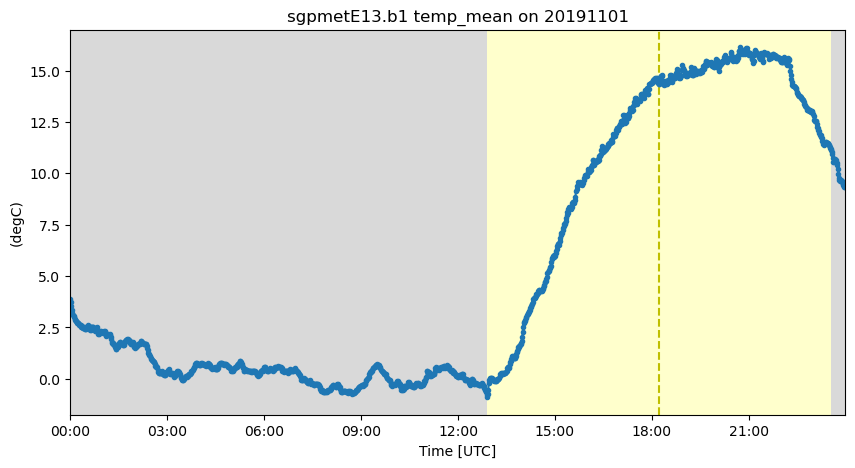

In [13]:
var_name = 'temp_mean'
filename = str(Path('..', 'data', 'sgpmetE13.b1', 'sgpmetE13.b1.20191101.000000.cdf'))
met_ds = act.io.armfiles.read_netcdf(filename, keep_variables=[var_name, 'lat', 'lon'])
display = act.plotting.TimeSeriesDisplay(met_ds, figsize=(10, 5))
ignore = display.plot('temp_mean', day_night_background=True)

2D plots can be a bit more difficult so ACT has done much of the heavy workfor you. The set up is the same to create the display object and the timeseries method to plot is the same .plot(). This will also allow for passing pcolormesh specific keywords to plot in log values. The x and y axis show units in correct format and a colorbar is added.

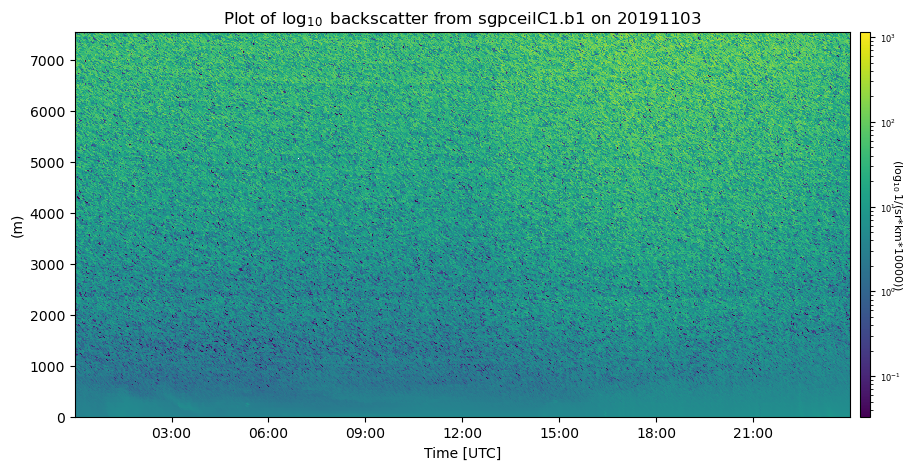

In [14]:
filename = str(Path('..', 'data', 'sgpceilC1.b1', 'sgpceilC1.b1.20191103.000012.nc'))
ceil_ds = act.io.armfiles.read_netcdf(filename, keep_variables='backscatter')

# We can change the data to a log scale for better plotting.
var_name = 'backscatter'
display = act.plotting.TimeSeriesDisplay(ceil_ds, figsize=(10, 5))
title = (r"Plot of $\log_{10}$ " f"{var_name} from {ceil_ds.attrs['datastream']} on {ceil_ds.attrs['_file_dates'][0]}")
colorbar_label = r"$\log_{10}$" + ceil_ds[var_name].attrs['units']
ignore = display.plot(var_name, norm=matplotlib.colors.LogNorm(), set_title=title, cbar_label=colorbar_label)


Cleanup the directory from the new netCDF file we created.

In [15]:
Path('sgpmetE13.b1.20191101.000000.nc').unlink(missing_ok=True)